# 📊 Unemployment Analysis in India


This project aims to analyze the unemployment rate in India, particularly focusing on the significant rise during the COVID-19 pandemic, using machine learning and data visualization techniques.

This project is proudly completed as part of the **AICTE Oasis Infobyte Internship 2025**.
    

In [21]:

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
    

## 📥 Load the Dataset

In [22]:

# Load the dataset
df = pd.read_csv('Unemployment in India.csv')



# Display the first few rows
df.head()
    

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


## 📊 Data Exploration

In [23]:

# Check the dataset structure
df.info()
df.describe()
df.isnull().sum()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

## 📈 Data Visualization

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


/tmp/ipykernel_7318/1590955158.py:8: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


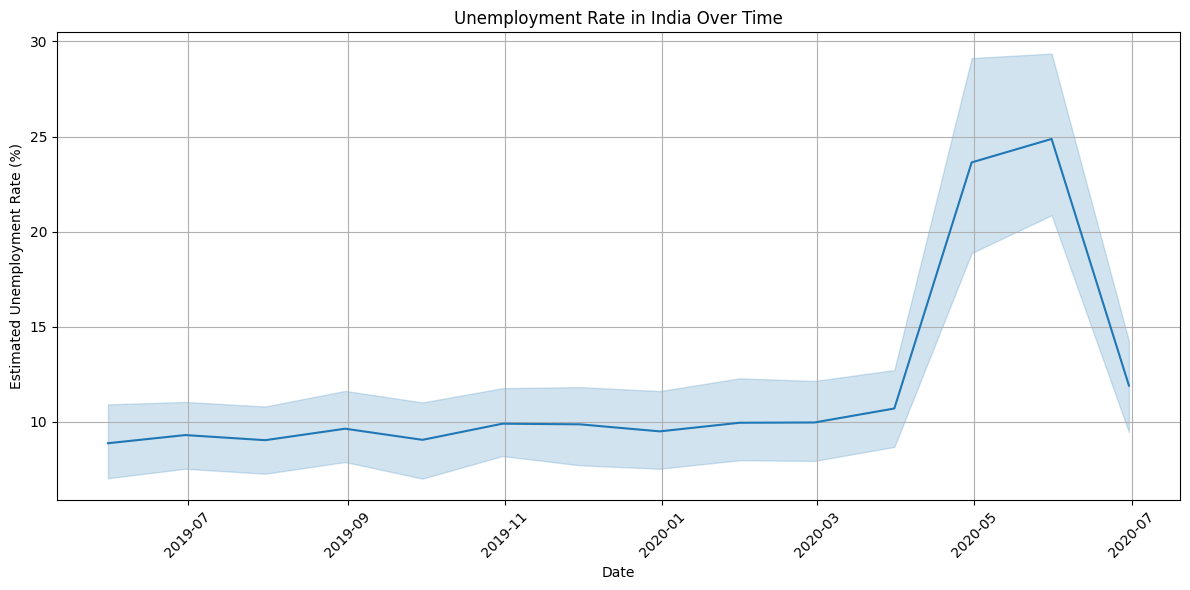

In [25]:

# Clean column names (in case there are spaces)
df.columns = df.columns.str.strip()

# Print to check correct column names
print(df.columns)

# Make sure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where 'Date' could not be converted
df = df.dropna(subset=['Date'])

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate in India Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 🔍 Feature Engineering

In [26]:

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df_encoded = pd.get_dummies(df, columns=['Region'], drop_first=True)
df_encoded.head()
    

/tmp/ipykernel_7318/805977701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
/tmp/ipykernel_7318/805977701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
/tmp/ipykernel_7318/805977701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Year,Region_Assam,Region_Bihar,...,Region_Puducherry,Region_Punjab,Region_Rajasthan,Region_Sikkim,Region_Tamil Nadu,Region_Telangana,Region_Tripura,Region_Uttar Pradesh,Region_Uttarakhand,Region_West Bengal
0,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,2019,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,2019,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,2019,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,2019,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,2019,False,False,...,False,False,False,False,False,False,False,False,False,False


## 🤖 Model Building

In [28]:
# Make sure all columns except target and Date are numeric
X = df_encoded.drop(['Estimated Unemployment Rate (%)', 'Date'], axis=1)

# Convert to numeric, force errors to NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Fill or drop NaNs
X = X.fillna(0)

y = df_encoded['Estimated Unemployment Rate (%)']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


## 📊 Model Evaluation

In [29]:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')
    

Root Mean Squared Error: 6.76
R2 Score: 0.68


## 💾 Save the Model

In [30]:

joblib.dump(model, 'unemployment_model.pkl')
print("Model saved successfully!")
    

Model saved successfully!
